In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
import re

ModuleNotFoundError: No module named 'pandas'

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/recipes.csv')

In [ ]:
print(f"Dataset shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

Dataset shape: (1090, 15)

Columns in the dataset:
['Unnamed: 0', 'recipe_name', 'prep_time', 'cook_time', 'total_time', 'servings', 'yield', 'ingredients', 'directions', 'rating', 'url', 'cuisine_path', 'nutrition', 'timing', 'img_src']


In [ ]:
print("\nSample data:")
df.head()


Sample data:


,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...


In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""

In [ ]:
df['processed_ingredients'] = df['ingredients'].apply(preprocess_text)

In [ ]:
print("Original vs Processed Ingredients (first row):")
print(f"Original: {df['ingredients'].iloc[0]}")
print(f"Processed: {df['processed_ingredients'].iloc[0]}")

Original vs Processed Ingredients (first row):
Original: 3 tablespoons butter, 2 pounds Granny Smith apples (or other firm, crisp apples), peeled, quartered, cored and sliced 1/4-inch thick, 1 pound Macintosh apples (or other soft-textured apples that fall apart when cooked), peeled, quartered, cored, and sliced 1/4-inch thick, ½ cup sugar, ½ cup dried cranberries, 1 sheet frozen puff pastry, thawed but still cold (follow package directions), 1  egg white, lightly beaten, 1 tablespoon sugar, 1 cup Optional: Ice cream or lightly sweetened whipped cream
Processed: tablespoons butter pounds granny smith apples or other firm crisp apples peeled quartered cored and sliced inch thick pound macintosh apples or other soft textured apples that fall apart when cooked peeled quartered cored and sliced inch thick ½ cup sugar ½ cup dried cranberries sheet frozen puff pastry thawed but still cold follow package directions egg white lightly beaten tablespoon sugar cup optional ice cream or lightly sw

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words = stopwords.words('english') # Change this line
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_ingredients'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (1090, 1126)


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

Cosine similarity matrix shape: (1090, 1090)


In [ ]:
indices = pd.Series(df.index, index=df['recipe_name']).drop_duplicates()

In [ ]:
print("Sample recipe names from the dataset:")
sample_recipes = df['recipe_name'].sample(5).tolist()
for i, recipe in enumerate(sample_recipes, 1):
    print(f"{i}. {recipe}")

Sample recipe names from the dataset:
1. Fresh Orange Juice
2. Lime Pear Gelatin Salad
3. Queen Elizabeth Cake I
4. Energy Balls without Peanut Butter
5. German Apple Cake


In [ ]:
def get_recommendations(recipe_name, cosine_sim=cosine_sim, df=df, indices=indices, top_n=10):
    try:
        # Get the index of the recipe that matches the title
        idx = indices[recipe_name]

        # Get the pairwise similarity scores of all recipes with that recipe
        # Access the row directly without calling toarray()
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the recipes based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the top_n most similar recipes (excluding the recipe itself)
        sim_scores = sim_scores[1:top_n+1]

        # Get the recipe indices
        recipe_indices = [i[0] for i in sim_scores]

        # Return the top matches with their similarity scores
        recommendations = df.iloc[recipe_indices][['recipe_name', 'ingredients', 'rating']]
        recommendations['similarity_score'] = [i[1] for i in sim_scores]
        return recommendations

    except KeyError:
        print(f"Recipe '{recipe_name}' not found in the dataset.")
        # Find closest recipe names that might match
        all_titles = df['recipe_name'].tolist()
        import difflib
        closest_matches = difflib.get_close_matches(recipe_name, all_titles, n=5, cutoff=0.6)
        if closest_matches:
            print(f"Did you mean one of these? {closest_matches}")
        return pd.DataFrame()

In [ ]:
sample_recipe = sample_recipes[0]  # Using the first sample recipe

# Get the index for the sample recipe using the 'indices' Series
idx = indices[sample_recipe]

# Now you can use 'idx' to access the cosine similarity scores:
sim_scores = list(enumerate(cosine_sim[idx]))
print(sim_scores) # Print the sim_scores

[(0, np.float64(0.0)), (1, np.float64(0.0)), (2, np.float64(0.0)), (3, np.float64(0.0)), (4, np.float64(0.0)), (5, np.float64(0.0)), (6, np.float64(0.0)), (7, np.float64(0.0)), (8, np.float64(0.0)), (9, np.float64(0.0)), (10, np.float64(0.0)), (11, np.float64(0.0)), (12, np.float64(0.0)), (13, np.float64(0.0)), (14, np.float64(0.0)), (15, np.float64(0.0)), (16, np.float64(0.0)), (17, np.float64(0.0)), (18, np.float64(0.0)), (19, np.float64(0.0)), (20, np.float64(0.0)), (21, np.float64(0.0)), (22, np.float64(0.0)), (23, np.float64(0.0)), (24, np.float64(0.0)), (25, np.float64(0.0)), (26, np.float64(0.0)), (27, np.float64(0.0)), (28, np.float64(0.0)), (29, np.float64(0.0)), (30, np.float64(0.0)), (31, np.float64(0.0)), (32, np.float64(0.0)), (33, np.float64(0.0)), (34, np.float64(0.0)), (35, np.float64(0.0)), (36, np.float64(0.0)), (37, np.float64(0.0)), (38, np.float64(0.0)), (39, np.float64(0.0)), (40, np.float64(0.0)), (41, np.float64(0.0)), (42, np.float64(0.0)), (43, np.float64(0.0)

In [ ]:
sim_scores = list(enumerate(cosine_sim[idx]))

In [ ]:
sample_recipe = sample_recipes[0]  # Using the first sample recipe

print(f"\nRecommendations for '{sample_recipe}':")
recommendations = get_recommendations(sample_recipe)
recommendations


Recommendations for 'Fresh Orange Juice':


,recipe_name,ingredients,rating,similarity_score
168,Homemade Old Fashioned Mix,"3 cups water, 3 cups white sugar, 3 clementin...",4.7,0.317616
985,5 Cup Salad,"1 cup mini marshmallows, 1 cup shredded coconu...",4.7,0.289607
529,Pretty Pomegranate Salad,"10 ounces fresh baby spinach leaves, 10 ounces...",4.5,0.248867
325,Orange Gelatin Salad,"1 (11 ounce) can mandarin oranges, drained, 1 ...",4.7,0.236516
518,Cranberry Pomegranate Sauce,"2 large tart apples, 2 pomegranates, peeled a...",4.5,0.223509
229,"Orange, Fig, and Gorgonzola Salad","2 heads romaine lettuce, chopped, 2 oranges -...",4.7,0.223440
312,Orange Crush! Fresh Squeezed Orange and Vodka ...,"2 cups ice cubes, or as needed, 2 fluid ounces...",4.7,0.206204
270,Watermelon Fruit Bowl,"1 large watermelon, 1 cantaloupe, halved and...",4.6,0.193744
640,PHILADELPHIA® Fruit Pizza,1 (16.5 ounce) package refrigerated sliceable ...,4.9,0.182327
493,Ponche de Frutas (Fruit Punch),"3 oranges, juiced, 3 lemons, juiced, ½ pound...",4.6,0.170486


In [ ]:
def find_recipes_by_ingredients(ingredients_list, df=df, top_n=10):
    # Convert input to lowercase for case-insensitive matching
    ingredients_list = [ing.lower() for ing in ingredients_list]

    # Create a mask for each ingredient
    masks = []
    for ingredient in ingredients_list:
        mask = df['processed_ingredients'].str.contains(ingredient, na=False)
        masks.append(mask)

    # Combine masks to find recipes containing ALL specified ingredients
    final_mask = masks[0]
    for mask in masks[1:]:
        final_mask = final_mask & mask

    # Get matching recipes
    matching_recipes = df[final_mask]

    # If no matches found with ALL ingredients, try finding recipes with ANY of the ingredients
    if len(matching_recipes) == 0:
        print("No recipes found with ALL specified ingredients. Showing recipes with ANY of the ingredients.")
        final_mask = masks[0]
        for mask in masks[1:]:
            final_mask = final_mask | mask
        matching_recipes = df[final_mask]

    # Sort by rating if available
    if 'rating' in df.columns:
        matching_recipes = matching_recipes.sort_values(by='rating', ascending=False)

    return matching_recipes[['recipe_name', 'ingredients', 'rating']].head(top_n)

In [ ]:
test_ingredients = ['chicken', 'garlic']
print(f"Recipes containing {test_ingredients}:")
find_recipes_by_ingredients(test_ingredients)


Recipes containing ['chicken', 'garlic']:


,recipe_name,ingredients,rating
825,Mexican Chicken and Rice Soup (Sopa de Pollo y...,"2 ½ quarts chicken stock, 2 pounds skin-on, bo...",5.0
883,Moroccan Lamb Stew with Apricots,"2 pounds boneless leg of lamb, cut into 1-inch...",5.0
862,Slow Cooker Chicken Tagine,"8 skinless, boneless chicken thighs, 2 large ...",4.9
871,Apricot Chicken Curry,"8 chicken drumsticks, salt and pepper to ta...",4.8
321,Lemon Chicken Orzo Soup,"8 ounces orzo pasta, 1 teaspoon olive oil, 3 m...",4.8
435,Curried Butternut Squash and Pear Soup,"1 (2 pound) butternut squash, 3 tablespoons un...",4.7
850,Mexican Botana Platter,"2 pounds beef skirt steak, 2 pounds boneless c...",4.7
671,Mahi Mahi with Coconut Rice and Mango Salsa,"2 tablespoons olive oil, 1 ½ teaspoons soy sau...",4.7
867,Instant Pot Chicken Tagine with Apricots and C...,"1 tablespoon olive oil, 4 skin-on, bone-in ch...",4.7
978,Instant Pot Coconut Curry Chicken,"1 tablespoon coconut oil, 1 medium onion, chop...",4.6


from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

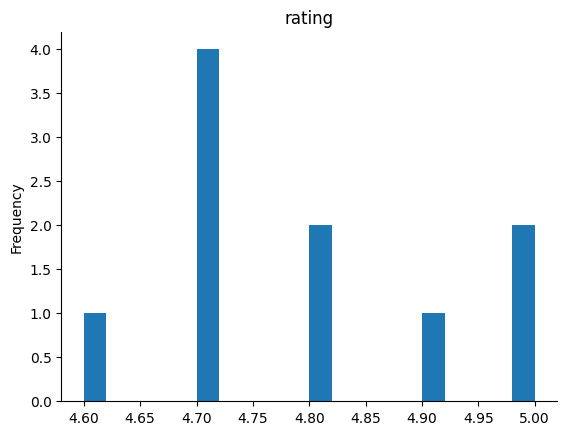

In [ ]:
from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

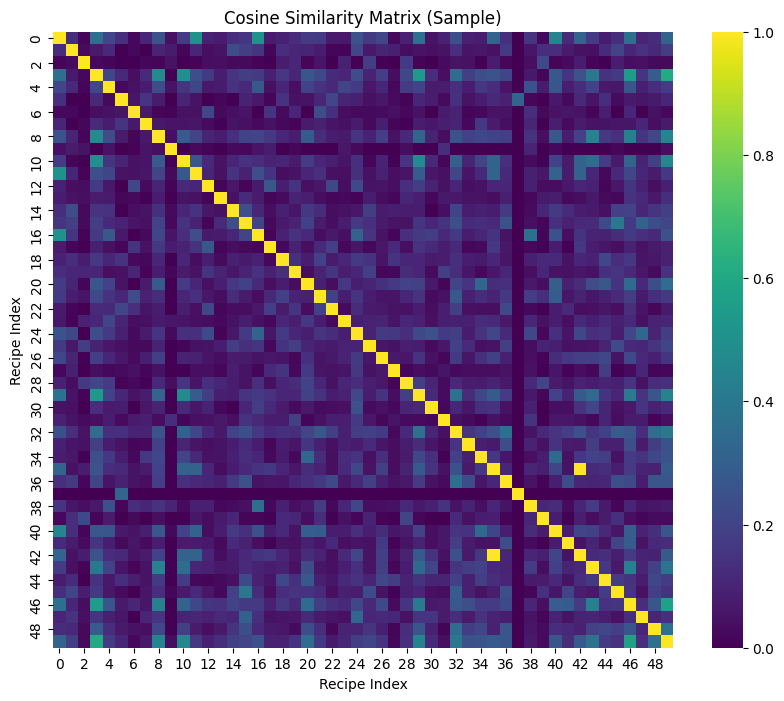

In [ ]:
!pip install seaborn
import seaborn as sns

sample_size = 50  # Adjust based on your dataset size
sample_indices = np.random.choice(cosine_sim.shape[0], sample_size, replace=False)
sample_sim_matrix = cosine_sim[np.ix_(sample_indices, sample_indices)]
plt.figure(figsize=(10, 8))
sns.heatmap(sample_sim_matrix, cmap='viridis') # Now sns is defined and can be used
plt.title('Cosine Similarity Matrix (Sample)')
plt.xlabel('Recipe Index')
plt.ylabel('Recipe Index')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

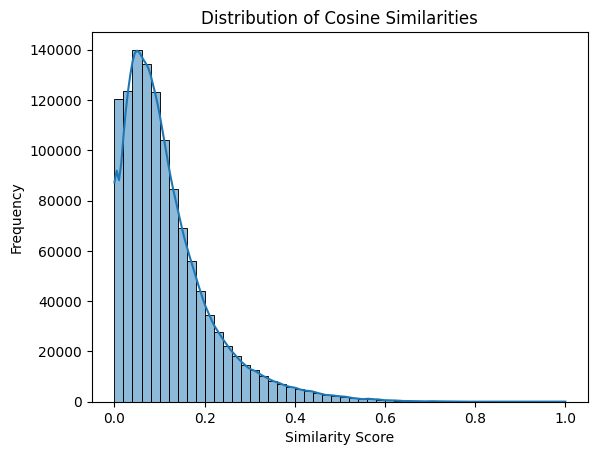

In [ ]:
similarities = cosine_sim.flatten()
similarities = similarities[similarities < 1.0]  # Exclude self-similarities
sns.histplot(similarities, bins=50, kde=True)
plt.title('Distribution of Cosine Similarities')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
 while True:
        print("\nOptions:")
        print("1. Get recommendations for a specific recipe")
        print("2. Find recipes by ingredients")
        print("3. Exit")

        choice = input("\nEnter your choice (1-3): ")

        if choice == '1':
            # Option 1: Get recommendations for a specific recipe
            recipe_name = input("\nEnter the name of a recipe: ")
            try:
                recommendations = get_recommendations(recipe_name)
                if not recommendations.empty:
                    print(f"\nTop 10 recommendations for '{recipe_name}':")
                    for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
                        print(f"{i}. {row['recipe_name']} (Similarity: {row['similarity_score']:.4f}, Rating: {row['rating']})")
            except Exception as e:
                print(f"Error: {e}")

        elif choice == '2':
            # Option 2: Find recipes by ingredients
            ingredients_input = input("\nEnter ingredients (separated by commas): ")
            ingredients_list = [ing.strip() for ing in ingredients_input.split(',')]

            try:
                matching_recipes = find_recipes_by_ingredients(ingredients_list)
                if not matching_recipes.empty:
                    print(f"\nTop recipes containing {ingredients_list}:")
                    for i, (idx, row) in enumerate(matching_recipes.iterrows(), 1):
                        print(f"{i}. {row['recipe_name']} (Rating: {row['rating']})")
                else:
                    print("No matching recipes found.")
            except Exception as e:
                print(f"Error: {e}")

        elif choice == '3':
            # Option 3: Exit
            print("\nThank you for using the Recipe Recommendation System!")
            break

        else:
            print("\nInvalid choice. Please enter a number between 1 and 3.")


Options:
1. Get recommendations for a specific recipe
2. Find recipes by ingredients
3. Exit

Enter your choice (1-3): 2

Enter ingredients (separated by commas): chicken

Top recipes containing ['chicken']:
1. Fresh Figs and Chicken Thighs in Shallot-Balsamic Reduction (Rating: 5.0)
2. Butternut Squash Soup with Persimmon (Rating: 5.0)
3. Mexican Chicken and Rice Soup (Sopa de Pollo y Arroz) (Rating: 5.0)
4. Moroccan Lamb Stew with Apricots (Rating: 5.0)
5. Slow Cooker Chicken Tagine (Rating: 4.9)
6. Spinach Salad with Chicken, Avocado, and Goat Cheese (Rating: 4.9)
7. Poblano and Ground Pork Tacos (Rating: 4.8)
8. Lemon Chicken Orzo Soup (Rating: 4.8)
9. Mulligatawny Soup (Rating: 4.8)
10. Pork Tenderloin with Apples and Onions (Rating: 4.8)

Options:
1. Get recommendations for a specific recipe
2. Find recipes by ingredients
3. Exit

Enter your choice (1-3): 1

Enter the name of a recipe: lemon chicken orzo soup
Recipe 'lemon chicken orzo soup' not found in the dataset.
Did you mea

KeyboardInterrupt: Interrupted by user